In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
from glob import glob
stoch_dictionary_filepaths = glob("/Users/Sean/Desktop/bio_338/final_proj/data/saved_dictionaries/stochastic*")
fixed_dictionary_filepaths = glob("/Users/Sean/Desktop/bio_338/final_proj/data/saved_dictionaries/fixed*")

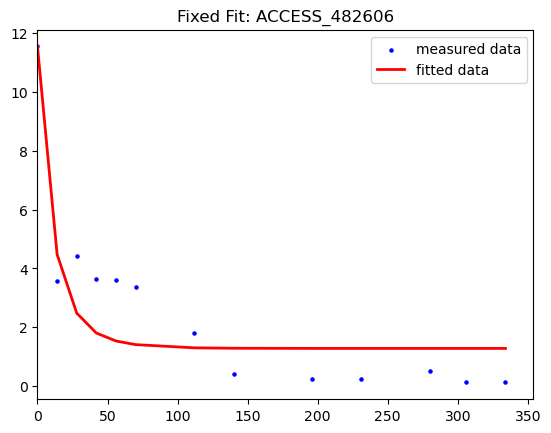

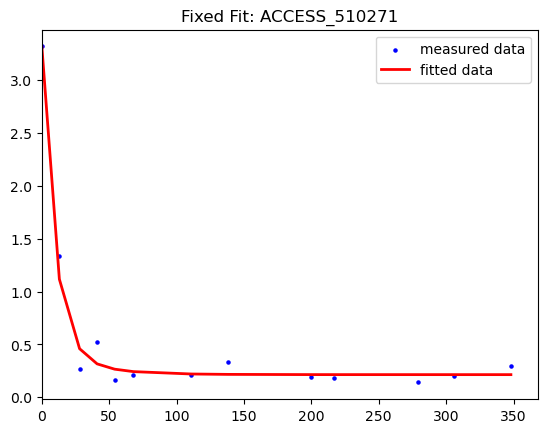

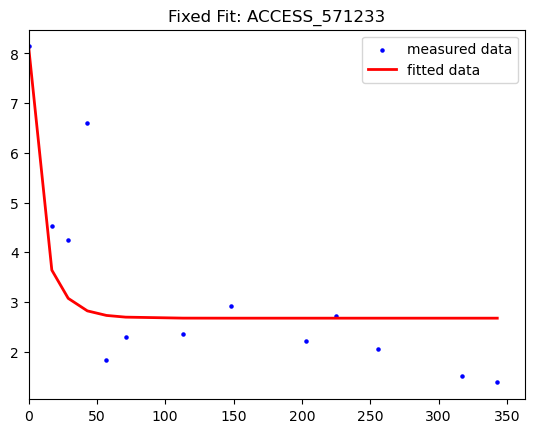

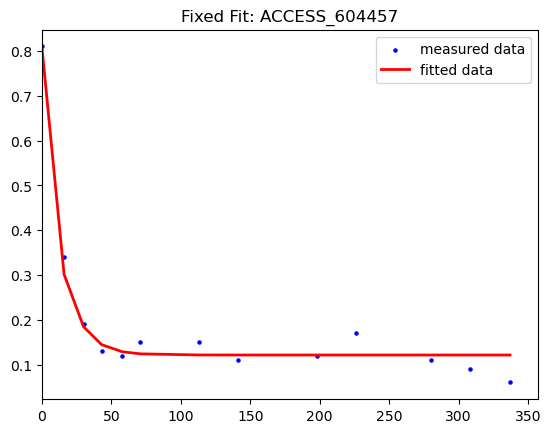

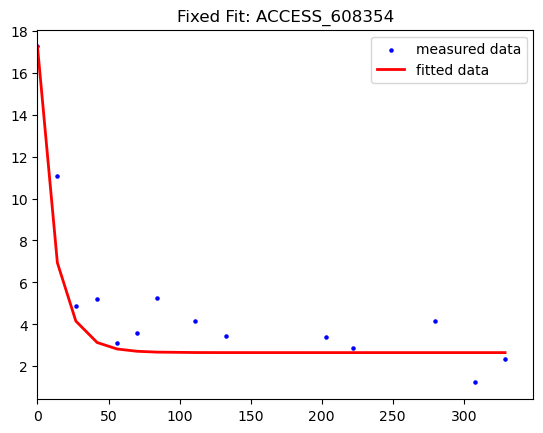

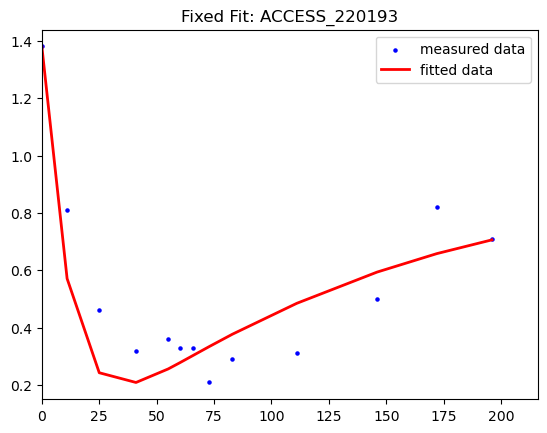

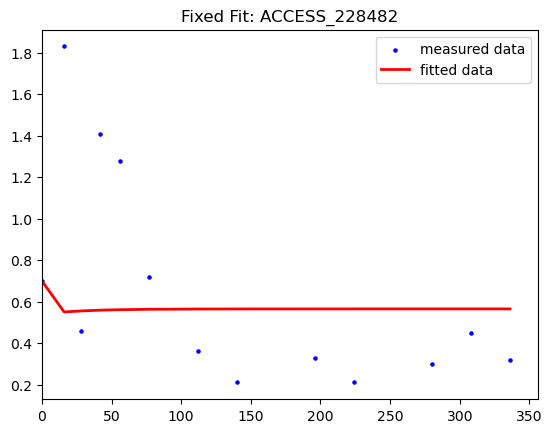

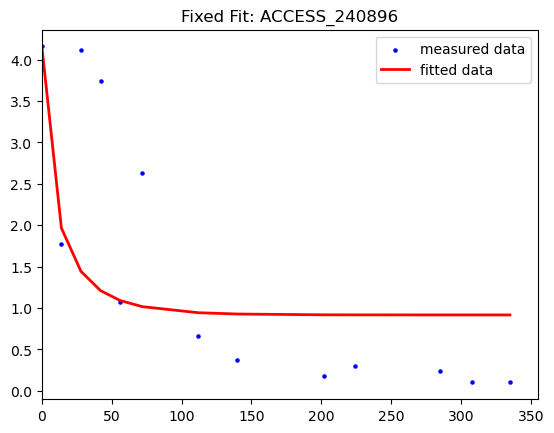

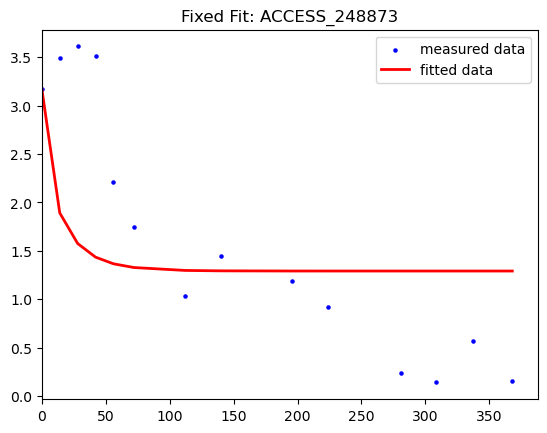

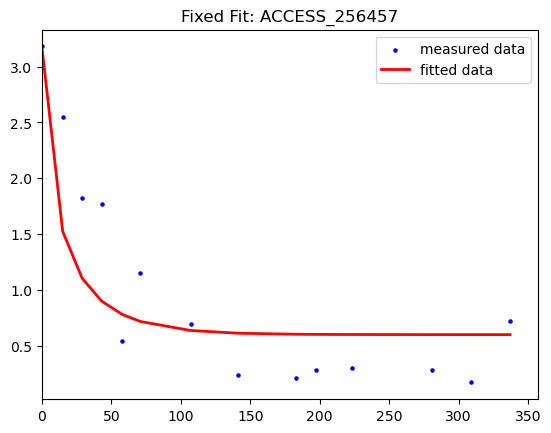

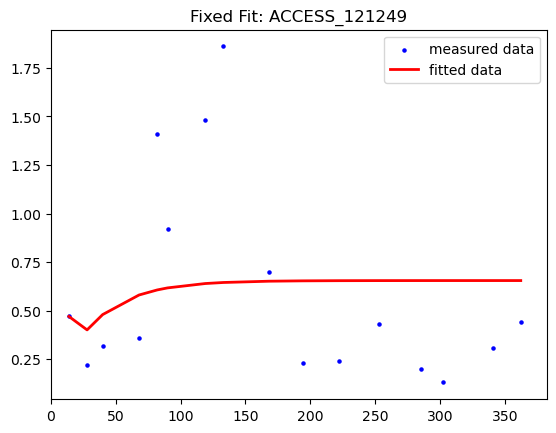

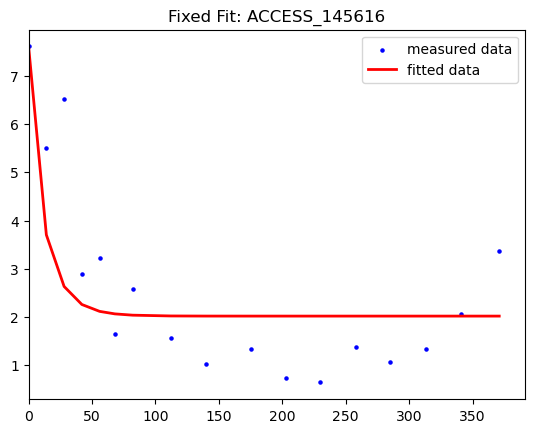

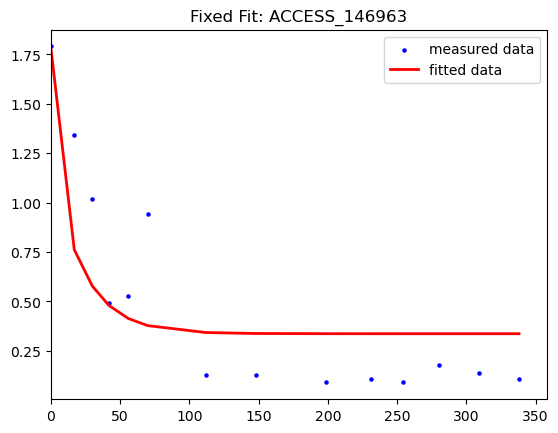

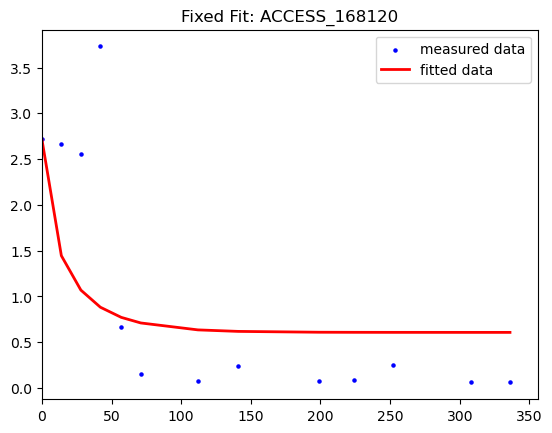

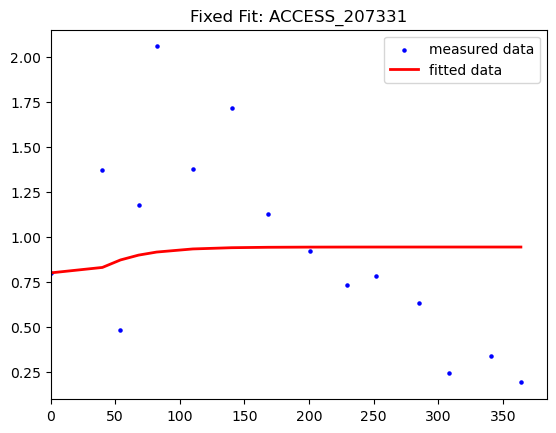

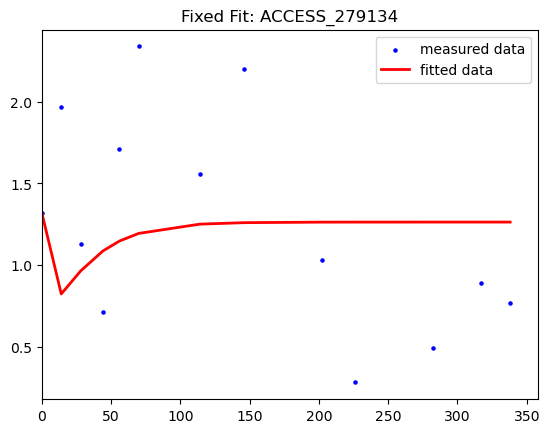

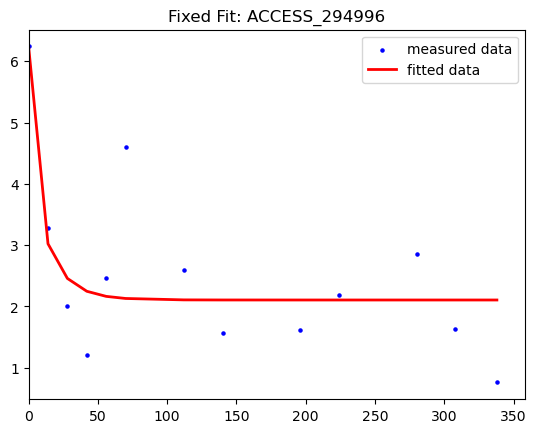

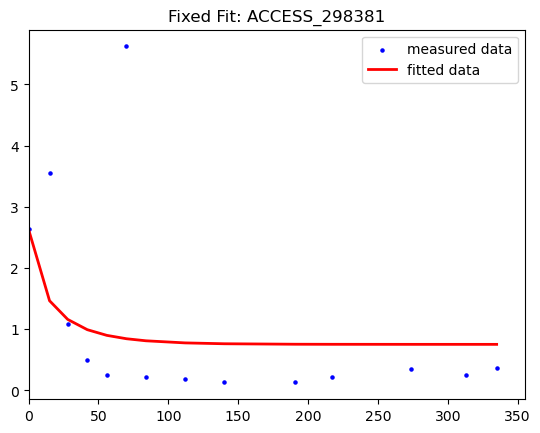

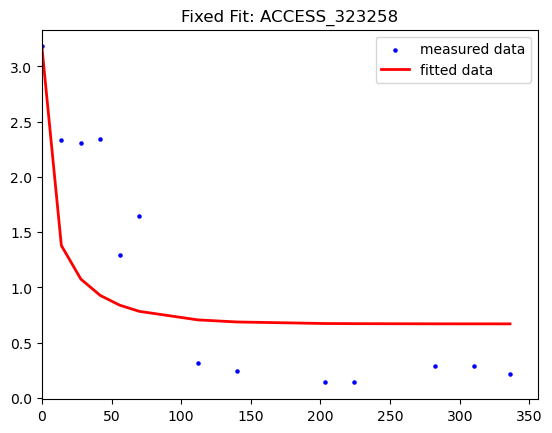

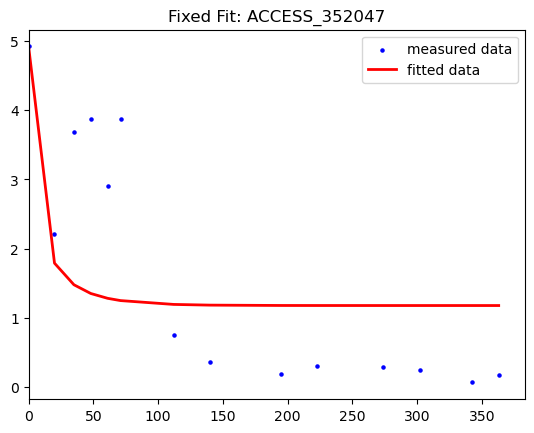

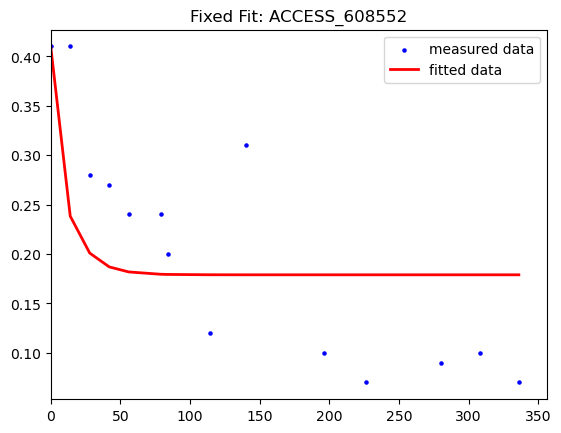

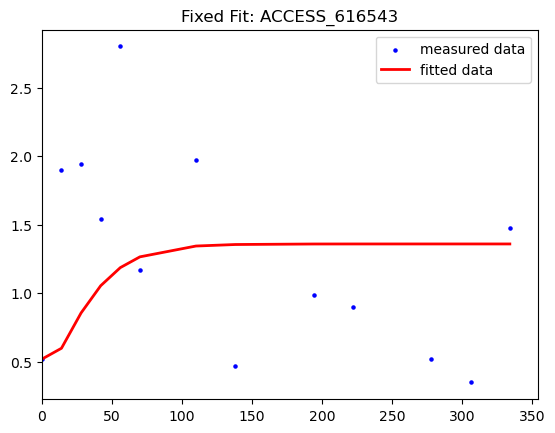

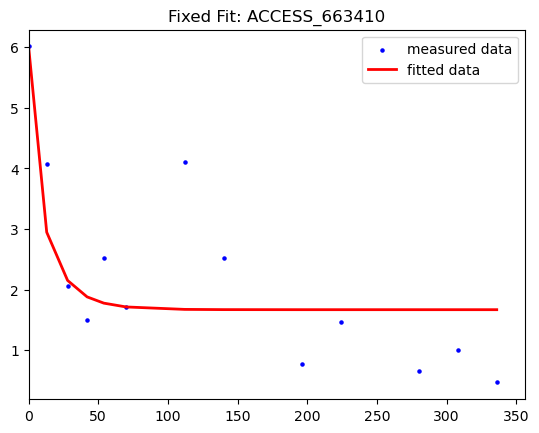

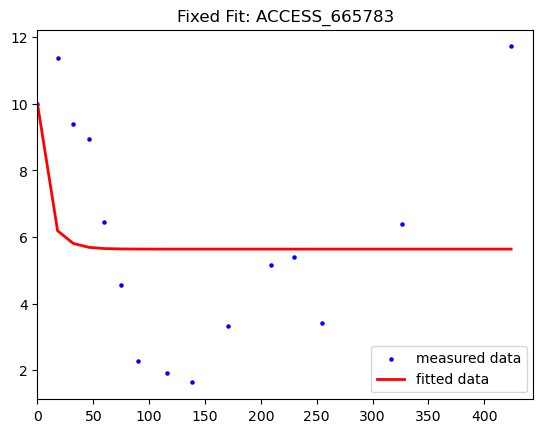

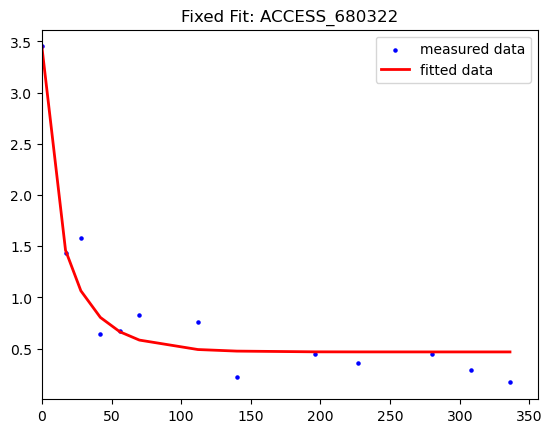

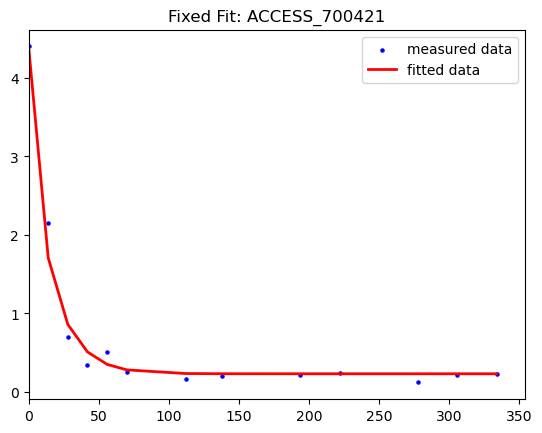

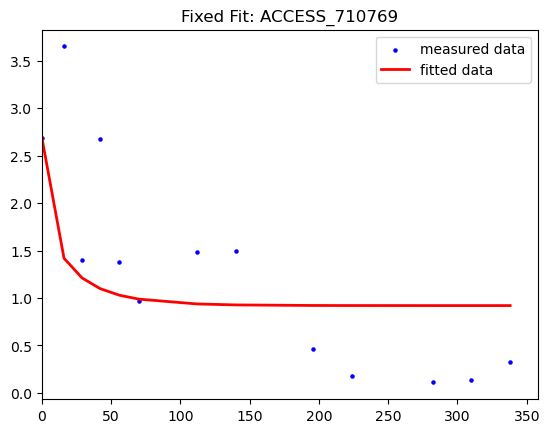

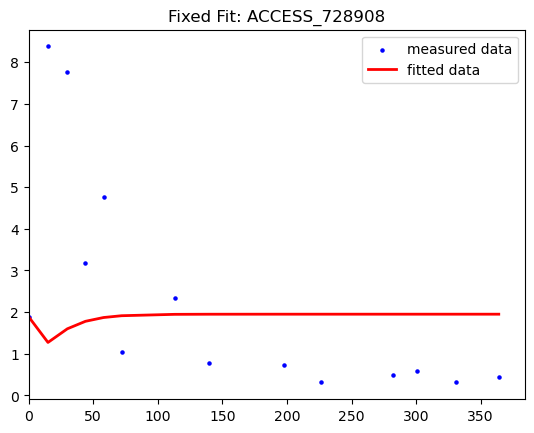

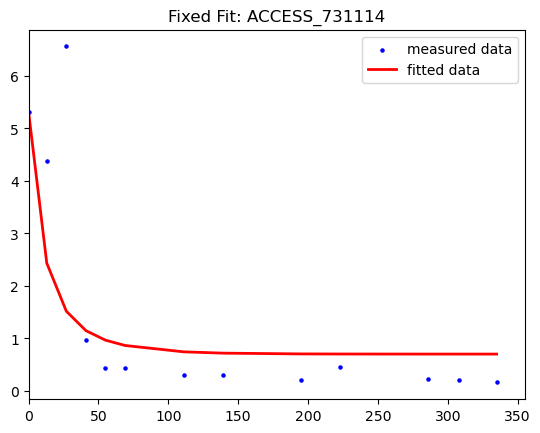

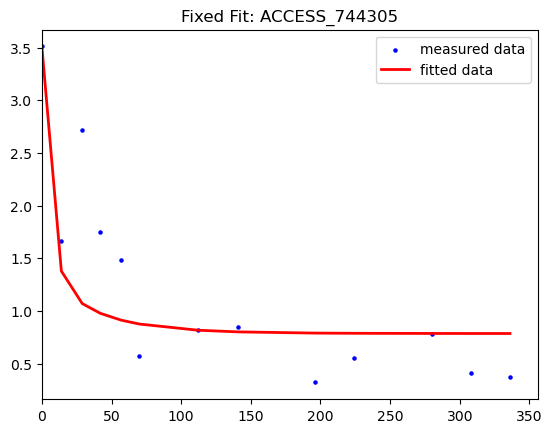

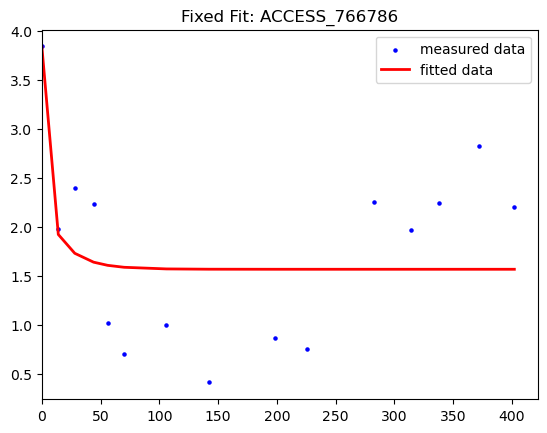

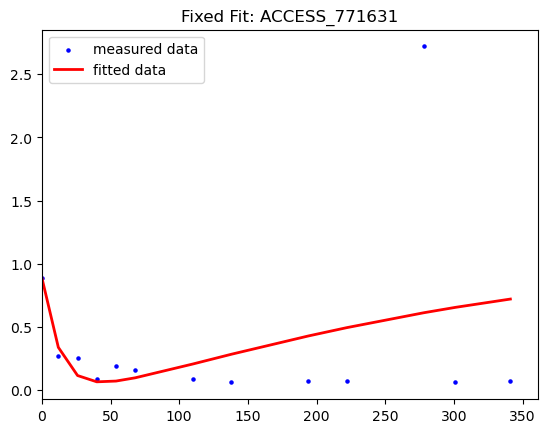

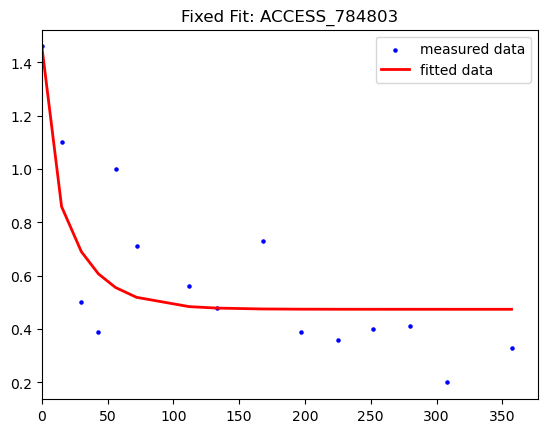

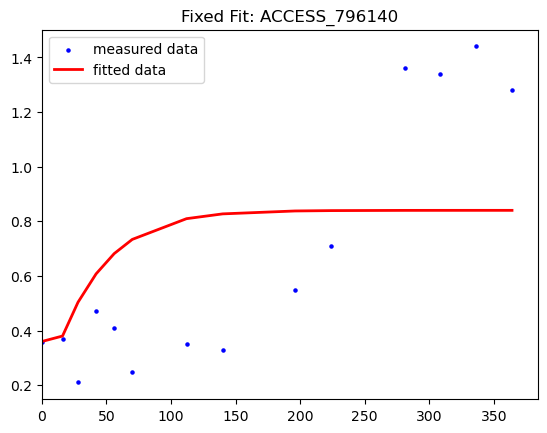

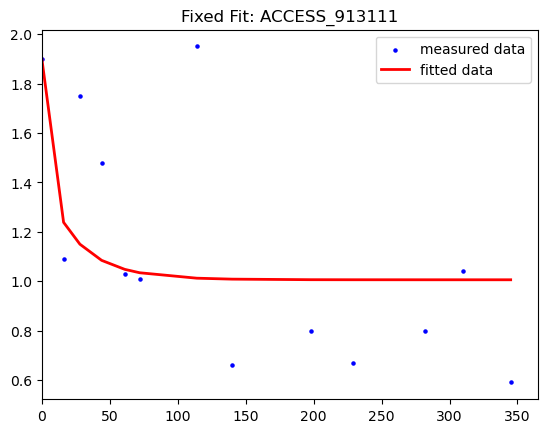

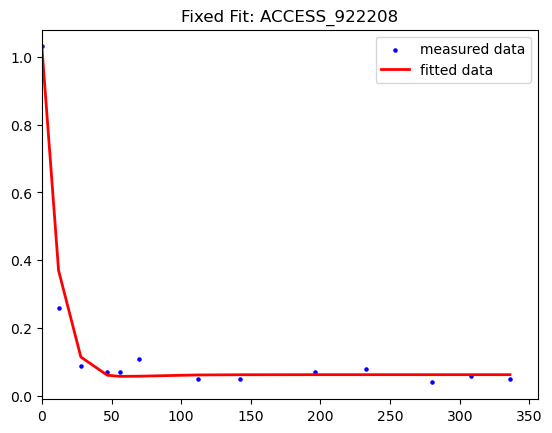

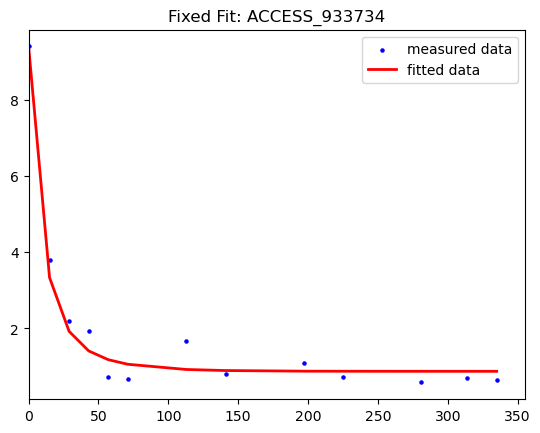

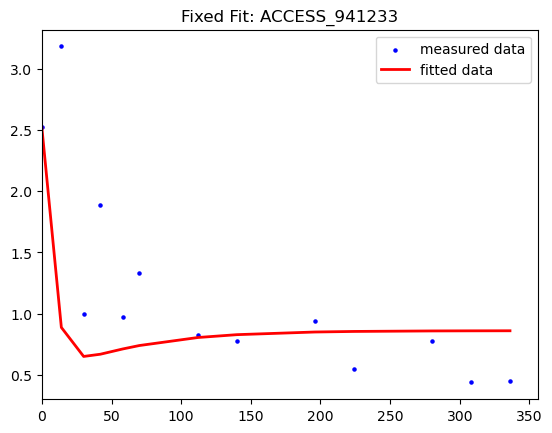

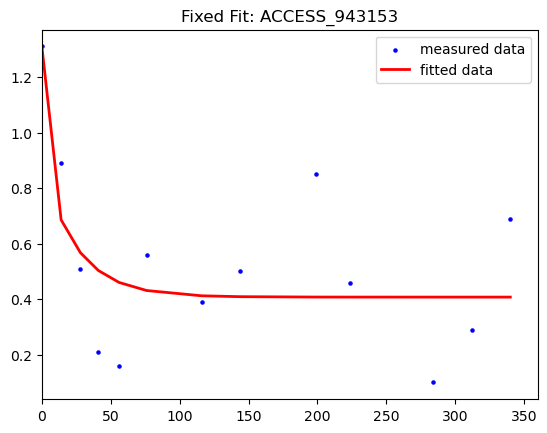

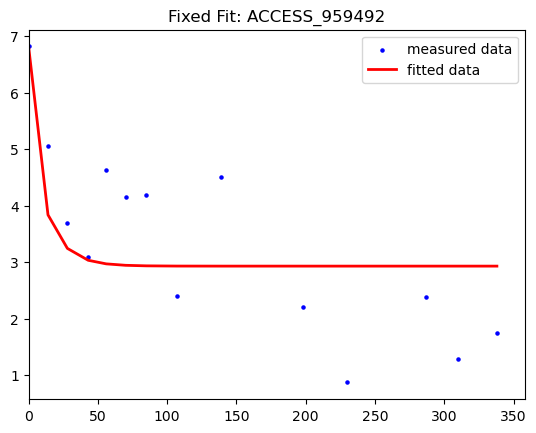

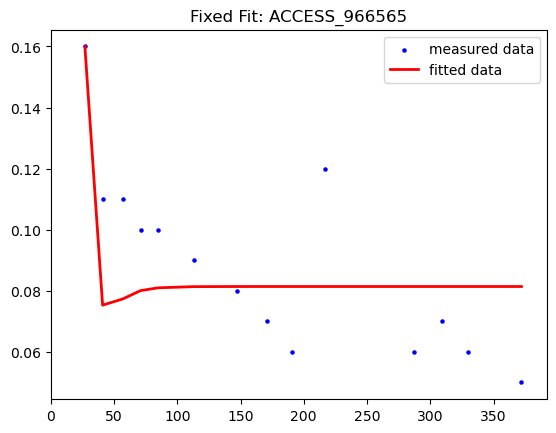

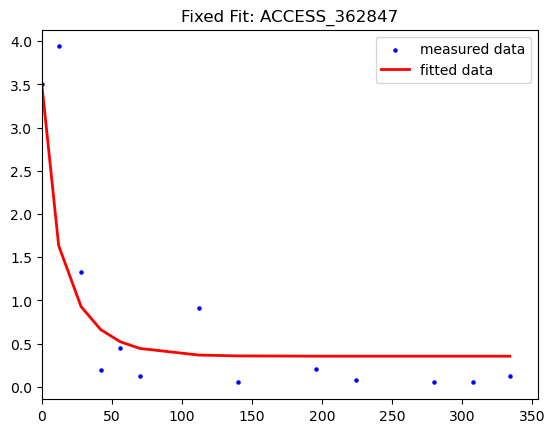

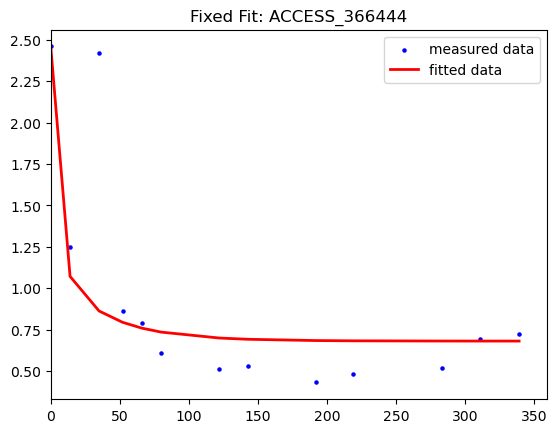

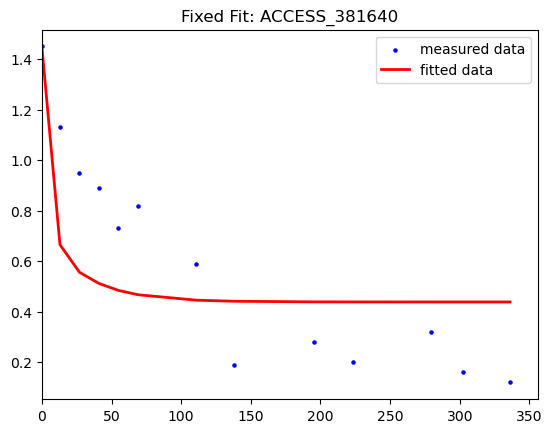

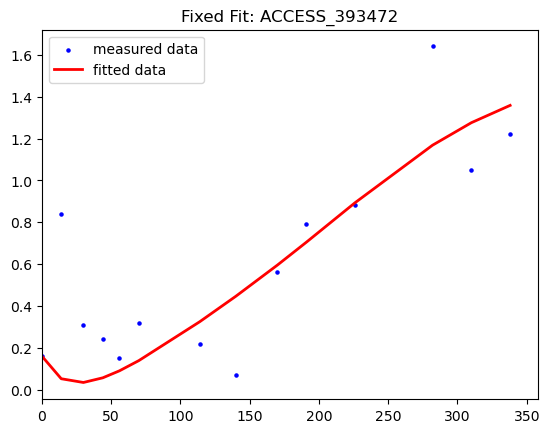

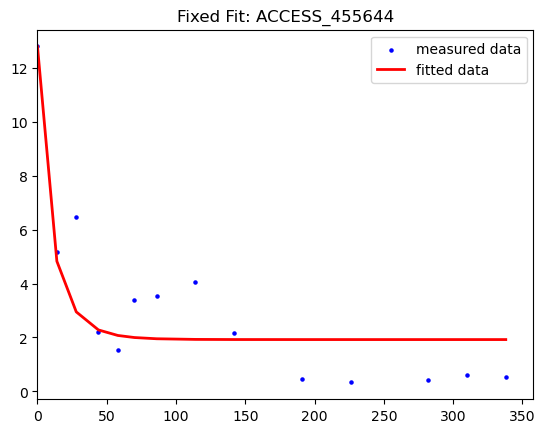

In [11]:
fixed_dictionaries = []
for file in fixed_dictionary_filepaths:
    fixed_dictionaries.append(np.load(file,allow_pickle='TRUE').item())

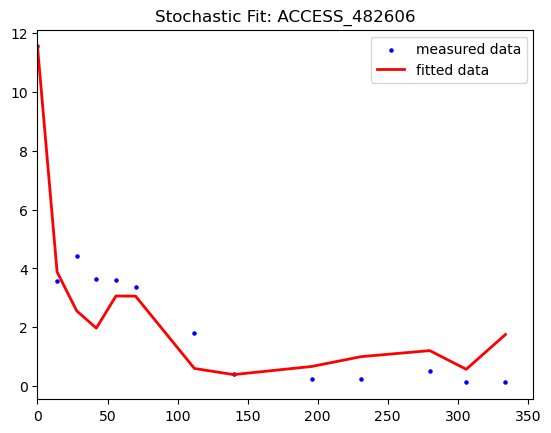

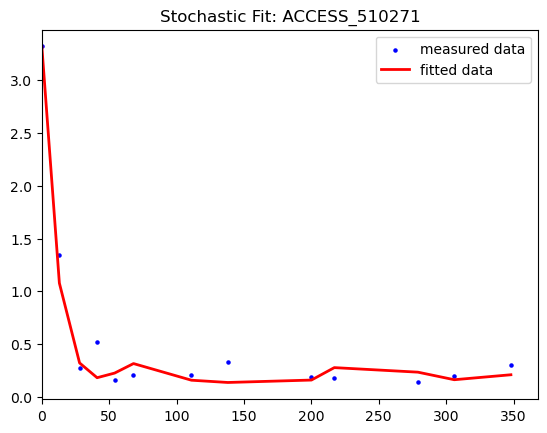

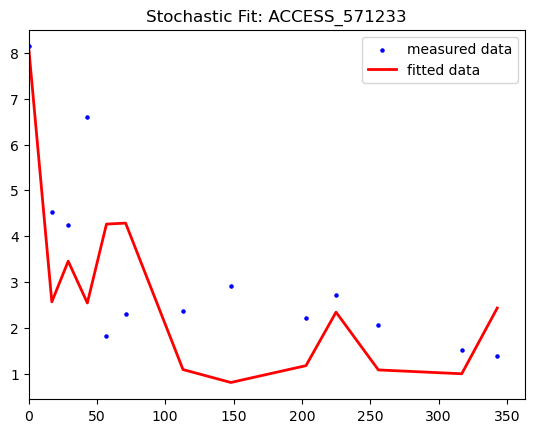

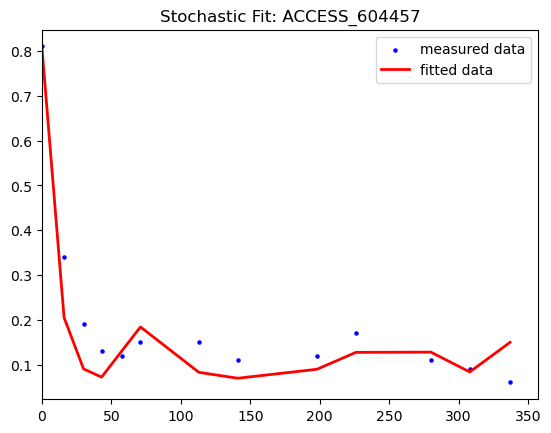

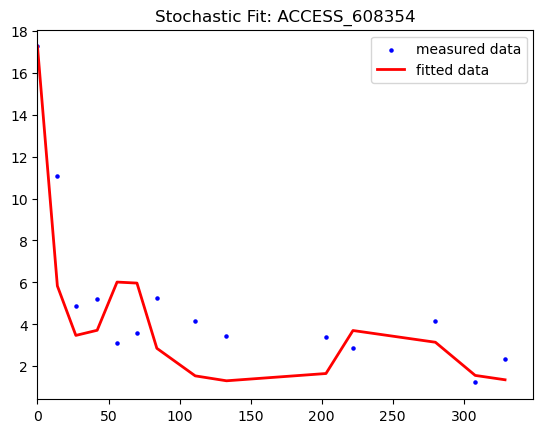

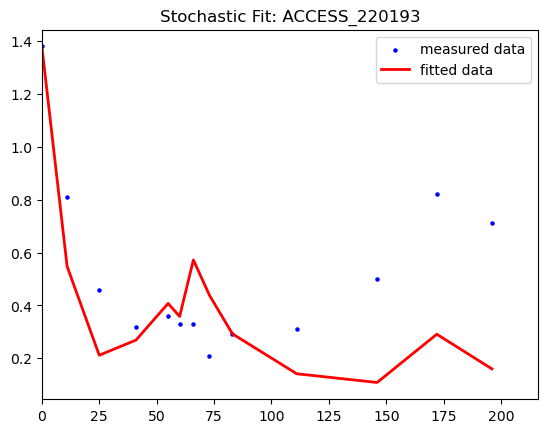

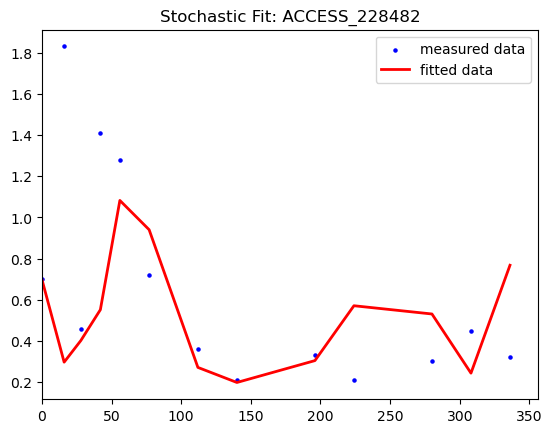

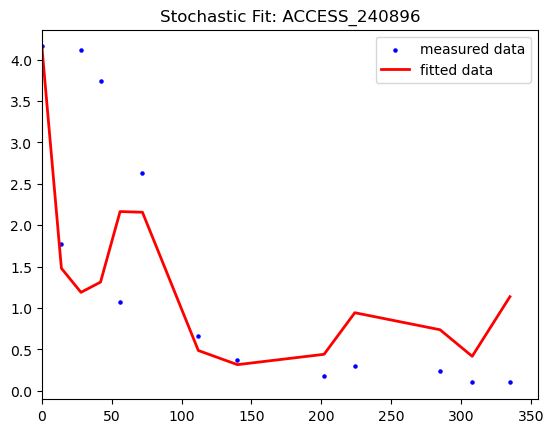

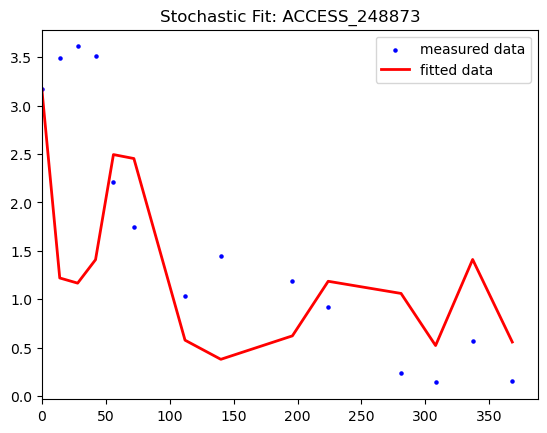

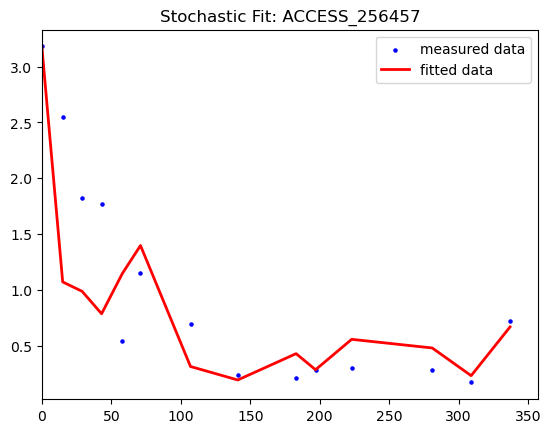

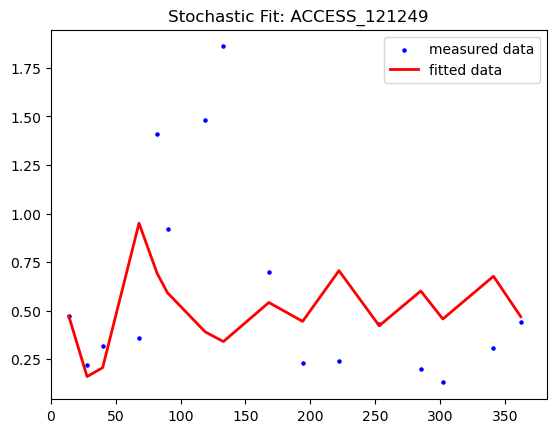

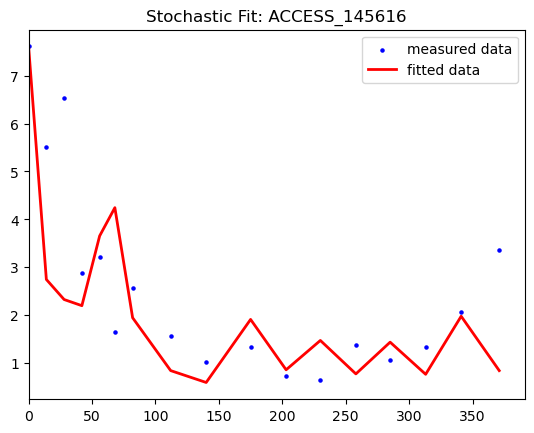

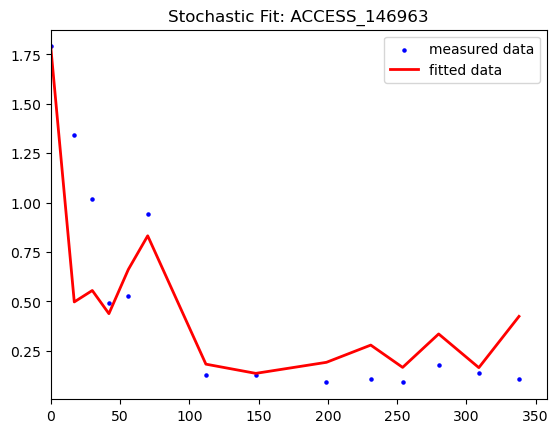

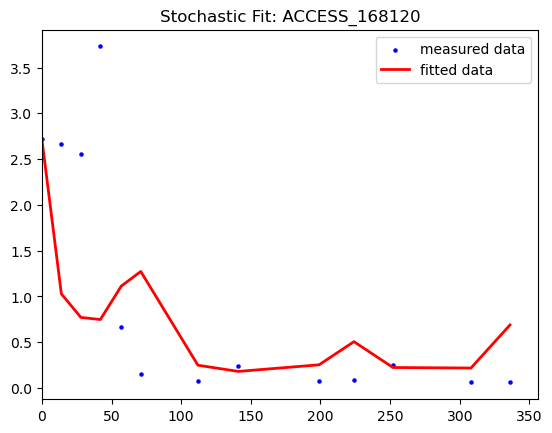

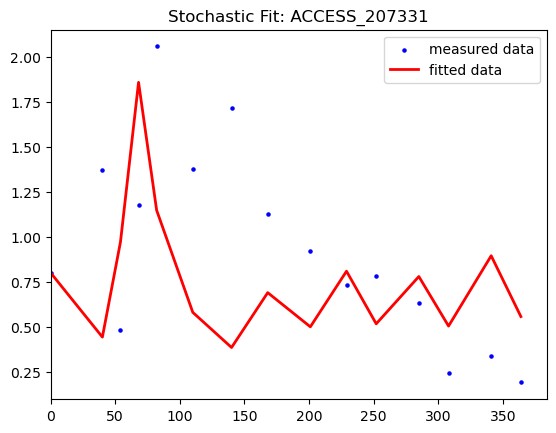

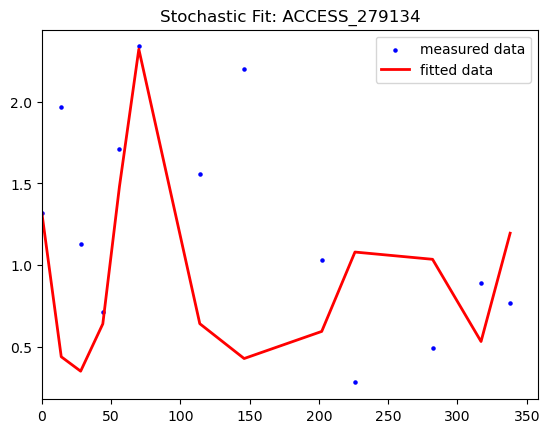

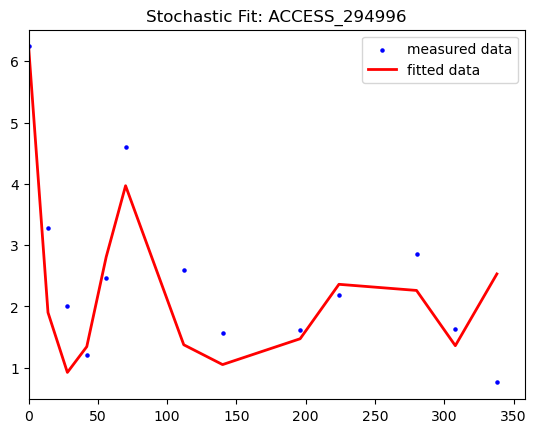

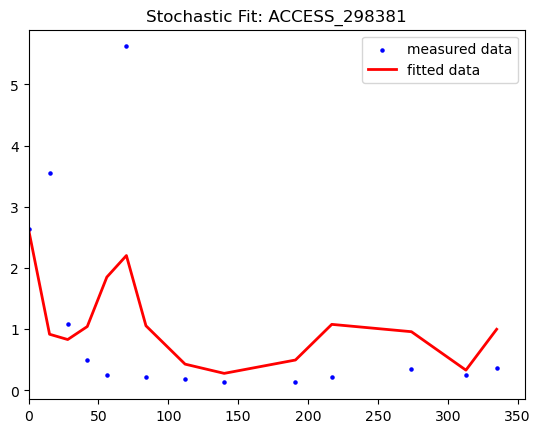

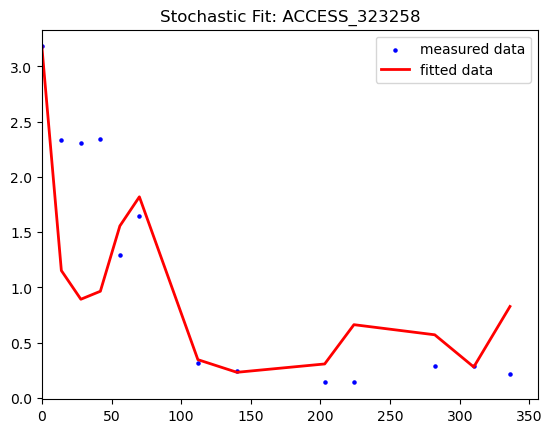

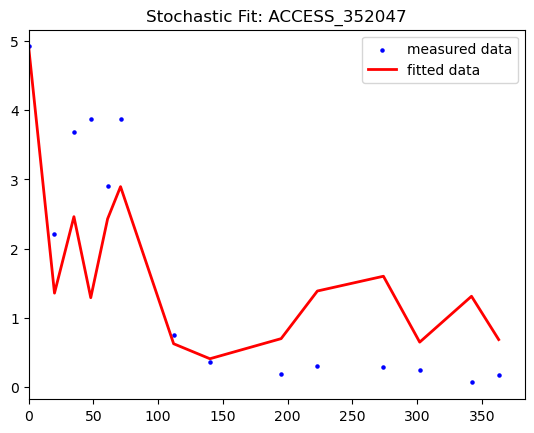

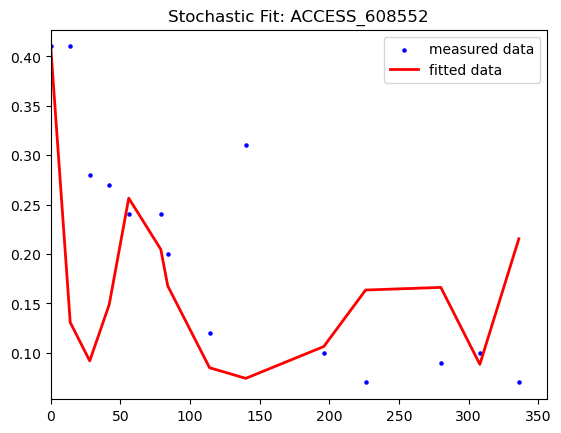

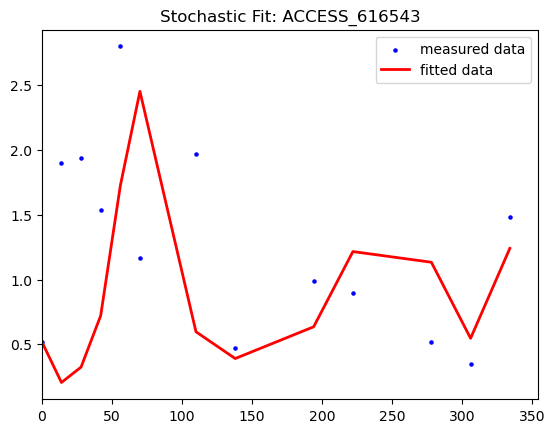

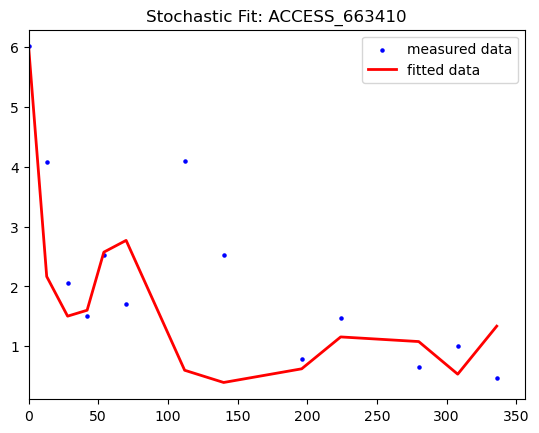

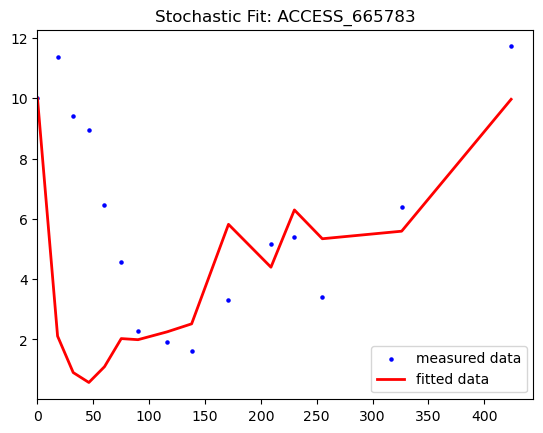

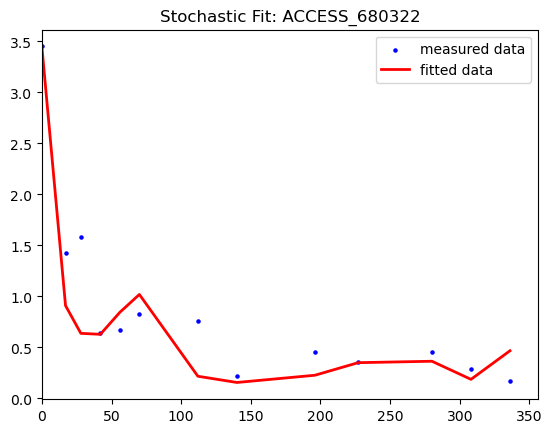

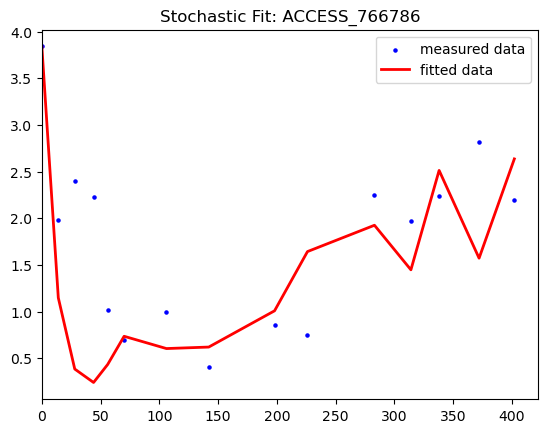

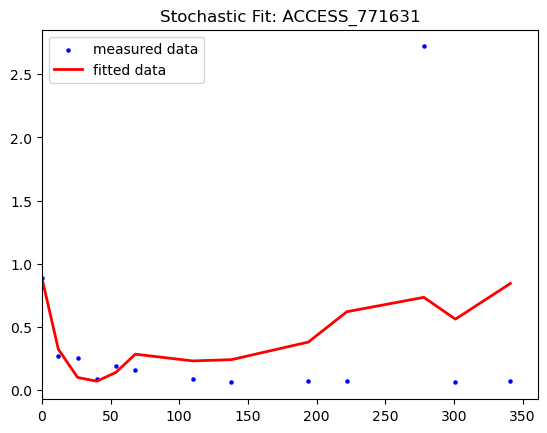

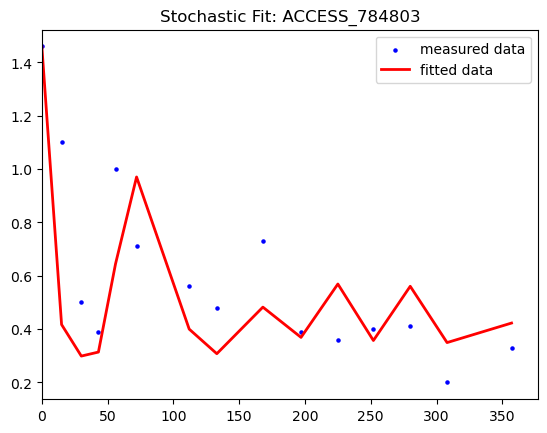

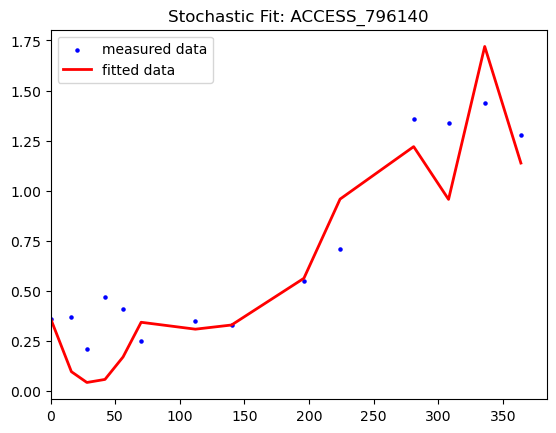

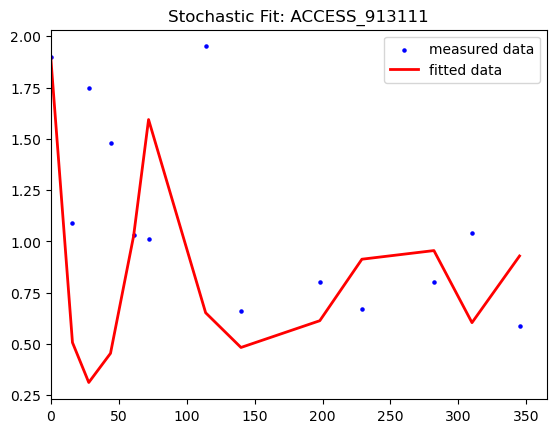

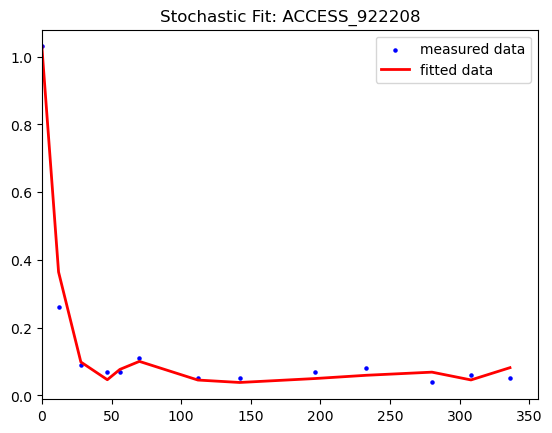

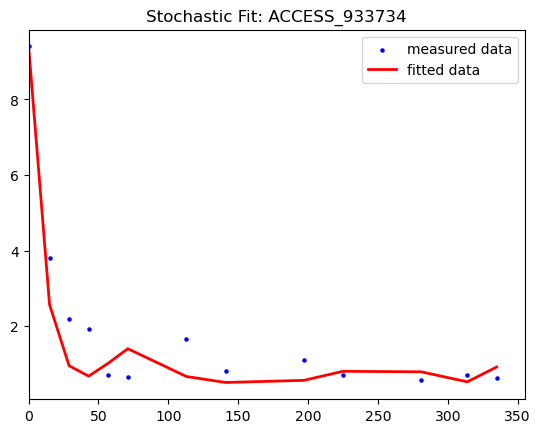

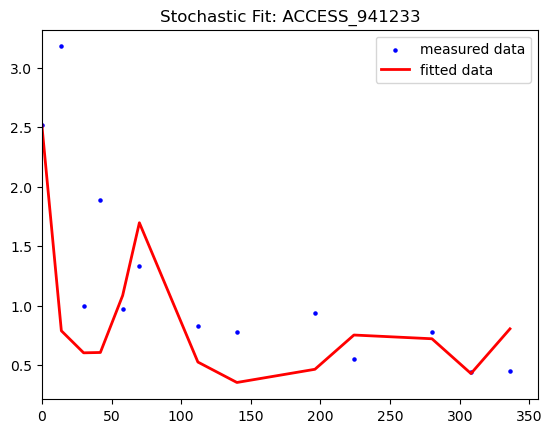

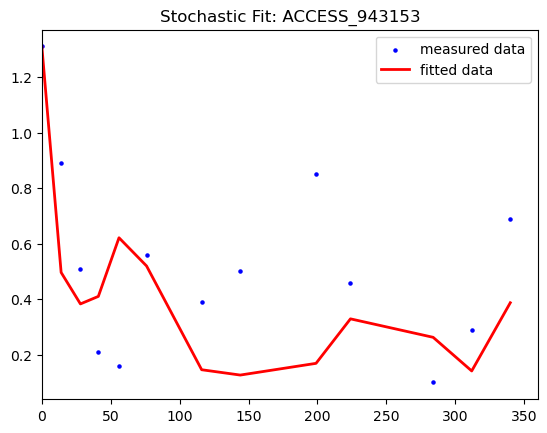

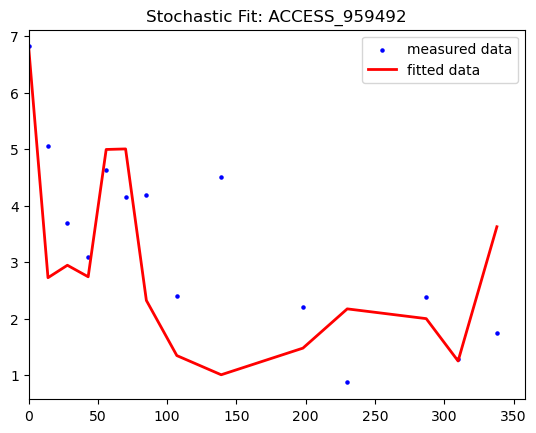

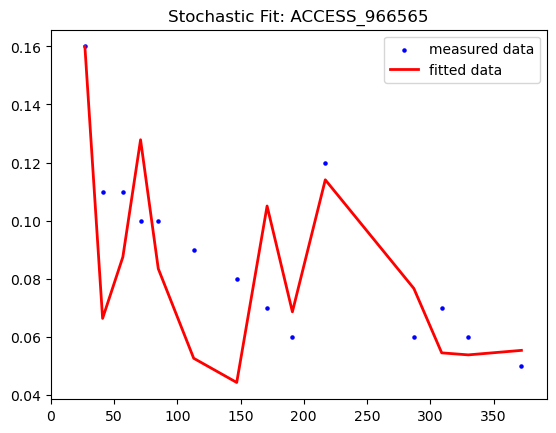

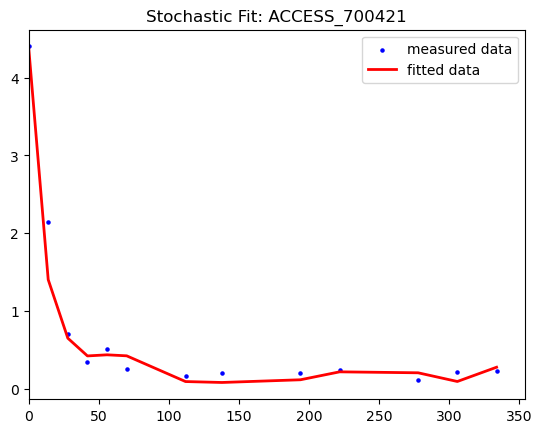

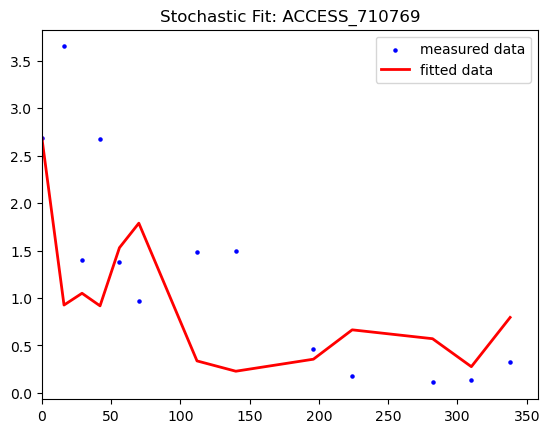

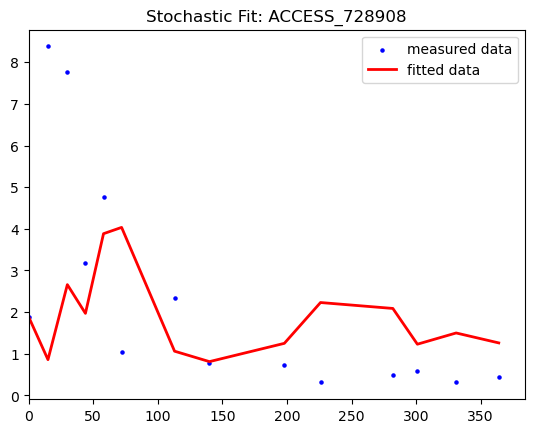

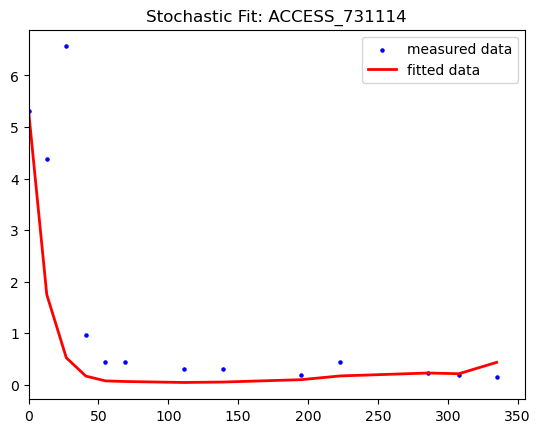

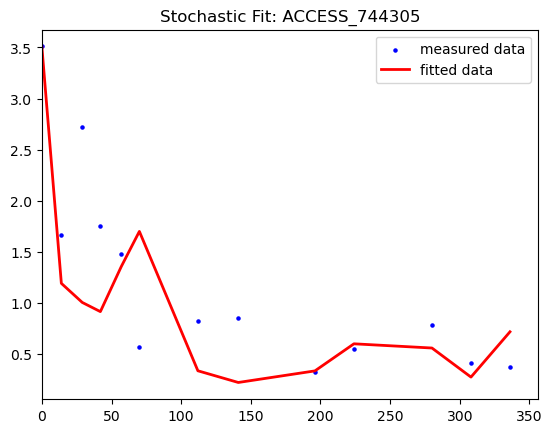

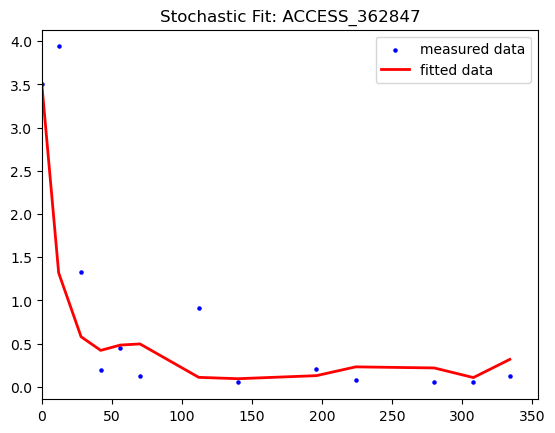

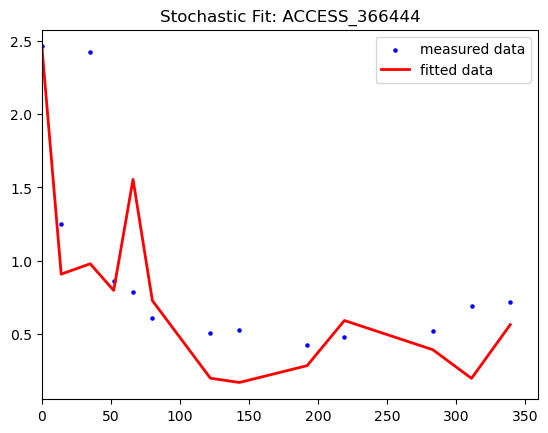

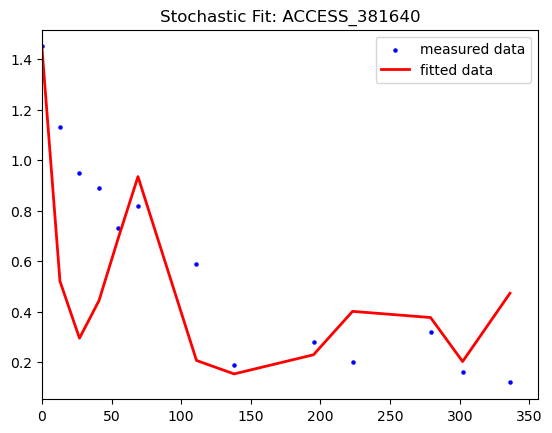

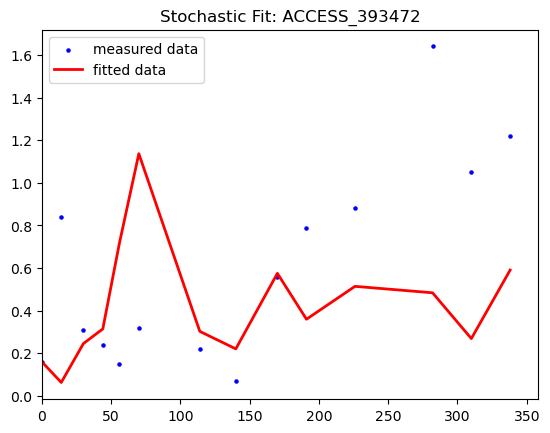

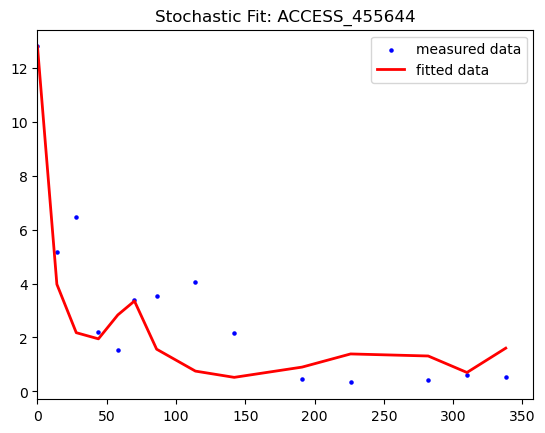

In [12]:
stochastic_dictionaries = []
for file in stoch_dictionary_filepaths:
    stochastic_dictionaries.append(np.load(file,allow_pickle='TRUE').item())

In [13]:
params_varied = ('kip', 'kdip', 'kap', 'kpi')
parameter_values = []
for dictionary in fixed_dictionaries:
    for key in dictionary:
        for param in params_varied:
            parameter_values.append((key, param, dictionary.get(key)[0].params.get(param).value))

fixed_values = pd.DataFrame(parameter_values, columns = ("ID", "parameter", "value"))
fixed_values['model_type'] = 'fixed'
fixed_values

,ID,parameter,value,model_type
0,ACCESS_482606,kip,0.490052,fixed
1,ACCESS_482606,kdip,0.267148,fixed
2,ACCESS_482606,kap,0.000100,fixed
3,ACCESS_482606,kpi,0.689650,fixed
4,ACCESS_510271,kip,0.049009,fixed
...,...,...,...,...
179,ACCESS_393472,kpi,0.040060,fixed
180,ACCESS_455644,kip,0.210924,fixed
181,ACCESS_455644,kdip,0.148746,fixed
182,ACCESS_455644,kap,0.000201,fixed


In [14]:
params_varied = ('kip', 'kdip', 'kap', 'kpi')
parameter_values = []
for dictionary in stochastic_dictionaries:
    for key in dictionary:
        for param in params_varied:
            parameter_values.append((key, param, dictionary.get(key)[0].params.get(param).value))

stoch_values = pd.DataFrame(parameter_values, columns = ("ID", "parameter", "value"))
stoch_values['model_type'] = 'stochastic'
stoch_values

,ID,parameter,value,model_type
0,ACCESS_482606,kip,0.468491,stochastic
1,ACCESS_482606,kdip,0.207923,stochastic
2,ACCESS_482606,kap,0.000100,stochastic
3,ACCESS_482606,kpi,0.999885,stochastic
4,ACCESS_510271,kip,0.198660,stochastic
...,...,...,...,...
179,ACCESS_393472,kpi,0.104832,stochastic
180,ACCESS_455644,kip,0.245829,stochastic
181,ACCESS_455644,kdip,0.122005,stochastic
182,ACCESS_455644,kap,0.099997,stochastic


In [15]:
all_parameter_values = pd.concat((stoch_values, fixed_values),axis = 0)
all_parameter_values.to_csv('data/fitted_parameter_values.csv')
all_parameter_values

,ID,parameter,value,model_type
0,ACCESS_482606,kip,0.468491,stochastic
1,ACCESS_482606,kdip,0.207923,stochastic
2,ACCESS_482606,kap,0.000100,stochastic
3,ACCESS_482606,kpi,0.999885,stochastic
4,ACCESS_510271,kip,0.198660,stochastic
...,...,...,...,...
179,ACCESS_393472,kpi,0.040060,fixed
180,ACCESS_455644,kip,0.210924,fixed
181,ACCESS_455644,kdip,0.148746,fixed
182,ACCESS_455644,kap,0.000201,fixed
